## STEP 1: **CHECKING GPU RESOURCES AND LIBRARIES AVAILABILITY:**

In [1]:
!nvidia-smi

Thu Aug 28 07:43:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.9 MB/s eta 0:00:00:00:0100:01
  Attempting unins

## **Step #02 Import Libraries**

In [35]:
import ultralytics
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ultralytics.checks()

from ultralytics import YOLO
from IPython.display import Image, FileLink, display
from roboflow import Roboflow

HOME = os.getcwd()
print(HOME)

Ultralytics 8.3.187 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6411.6/8062.4 GB disk)
/kaggle/working


## **Step #03 Download Dataset from Roboflow**

In [ ]:
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("YOUR_WORKSPACE_ID").project("YOUR_PROJECT_ID")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to Helmet-Detection-2 in yolov8:: 100%|██████████| 10346/10346 [00:01<00:00, 8139.67it/s]


## **Step #04 TRAIN MODEL WITH DATASET**

In [10]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=75 imgsz=640 plots=True patience=50 batch=32

[Errno 2] No such file or directory: '{HOME}'
/kaggle/working
Ultralytics 8.3.187 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Helmet-Detection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=75, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overl

### ***[OPTIONAL]*: DOWNLOAD RESULTS TO LOCAL DEVICE FROM KAGGLE:**

In [41]:
#BOTH THE WEIGHTS (BEST AND LAST MODEL) AND THE TRAINING RESULTS ARE WITHIN THE train2 DIRECTORY
# Define the source folder on Kaggle
source_folder = "runs/detect/val"

# Create a zip file of the training results
output_zip = "val_results.zip"
shutil.make_archive(output_zip.replace(".zip", ""), "zip", source_folder)

# Provide a download link
FileLink(output_zip)

/kaggle/working/val_results.zip

### **STEP #05: SHOWING RESULTS AND EVALUATION:**

Training Metrics Summary:
Best mAP@0.5: 0.988
Best mAP@0.5:0.95: 0.807
Best Precision: 0.973
Best Recall: 0.993


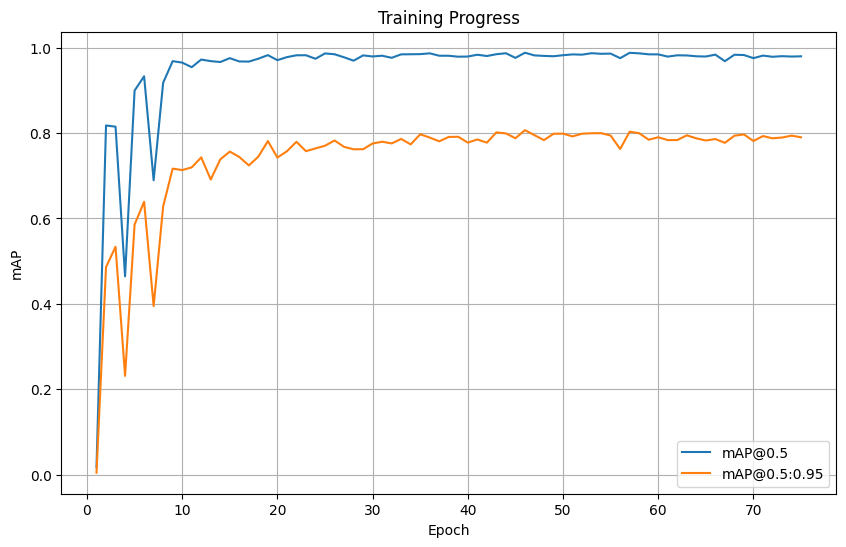

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 956, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolo/model.py", line 81, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 151, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 295, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 1549, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
    

In [19]:
# Load results.csv (adjust path if running locally after download)
results_path = "runs/detect/train/results.csv"  # Update if running on Kaggle or local
df = pd.read_csv(results_path)

# Display key metrics
print("Training Metrics Summary:")
print(f"Best mAP@0.5: {df['metrics/mAP50(B)'].max():.3f}")
print(f"Best mAP@0.5:0.95: {df['metrics/mAP50-95(B)'].max():.3f}")
print(f"Best Precision: {df['metrics/precision(B)'].max():.3f}")
print(f"Best Recall: {df['metrics/recall(B)'].max():.3f}")

# Plot training curves
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('Training Progress')
plt.legend()
plt.grid()
plt.show()

# Additional evaluation: Validate on validation set (run on Kaggle)
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

In [20]:
!ls {HOME}/runs/detect/train/

args.yaml			 results.csv	      val_batch0_labels.jpg
BoxF1_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
BoxR_curve.png			 train_batch2.jpg     val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch9360.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch9361.jpg  weights
labels.jpg			 train_batch9362.jpg


/kaggle/working


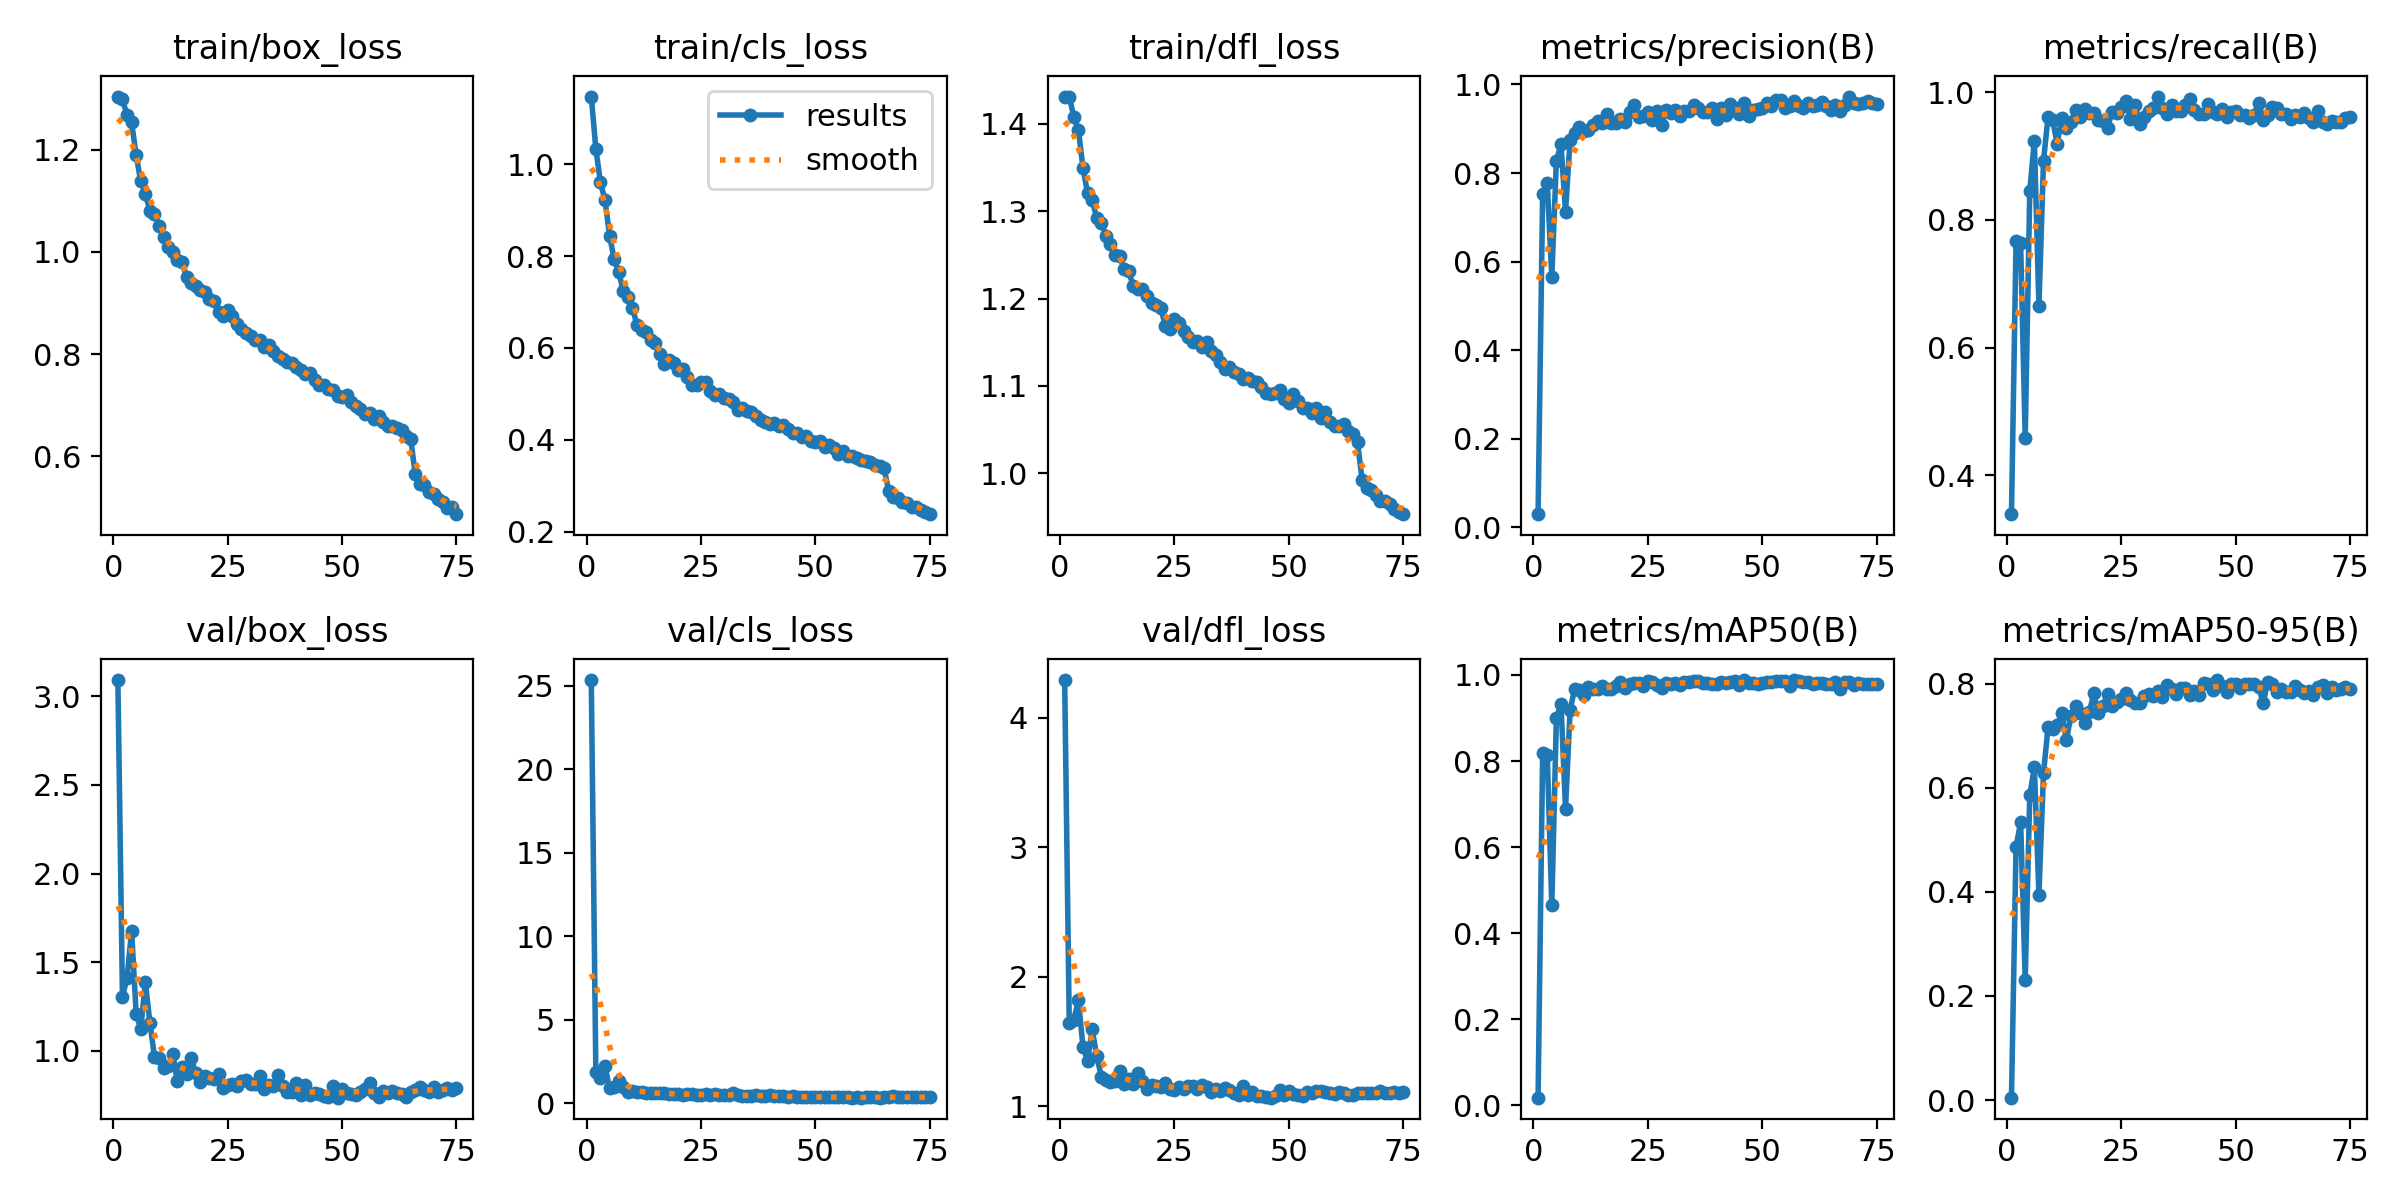

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [22]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics 8.3.187 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1544.1±458.7 MB/s, size: 59.4 KB)
val: Scanning /kaggle/working/Helmet-Detection-2/valid/labels.cache... 323 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 323/323 5074008.2it/s 0.0s0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 2.6it/s 8.0s
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
                   all        323        448      0.958      0.966      0.988      0.807
Speed: 1.1ms preprocess, 19.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results save

In [27]:
!ls {HOME}/runs/detect/val

BoxF1_curve.png  confusion_matrix_normalized.png  val_batch1_labels.jpg
BoxP_curve.png	 confusion_matrix.png		  val_batch1_pred.jpg
BoxPR_curve.png  val_batch0_labels.jpg		  val_batch2_labels.jpg
BoxR_curve.png	 val_batch0_pred.jpg		  val_batch2_pred.jpg


### **Display Validation Images and Metrics:**

Validation Prediction Samples:


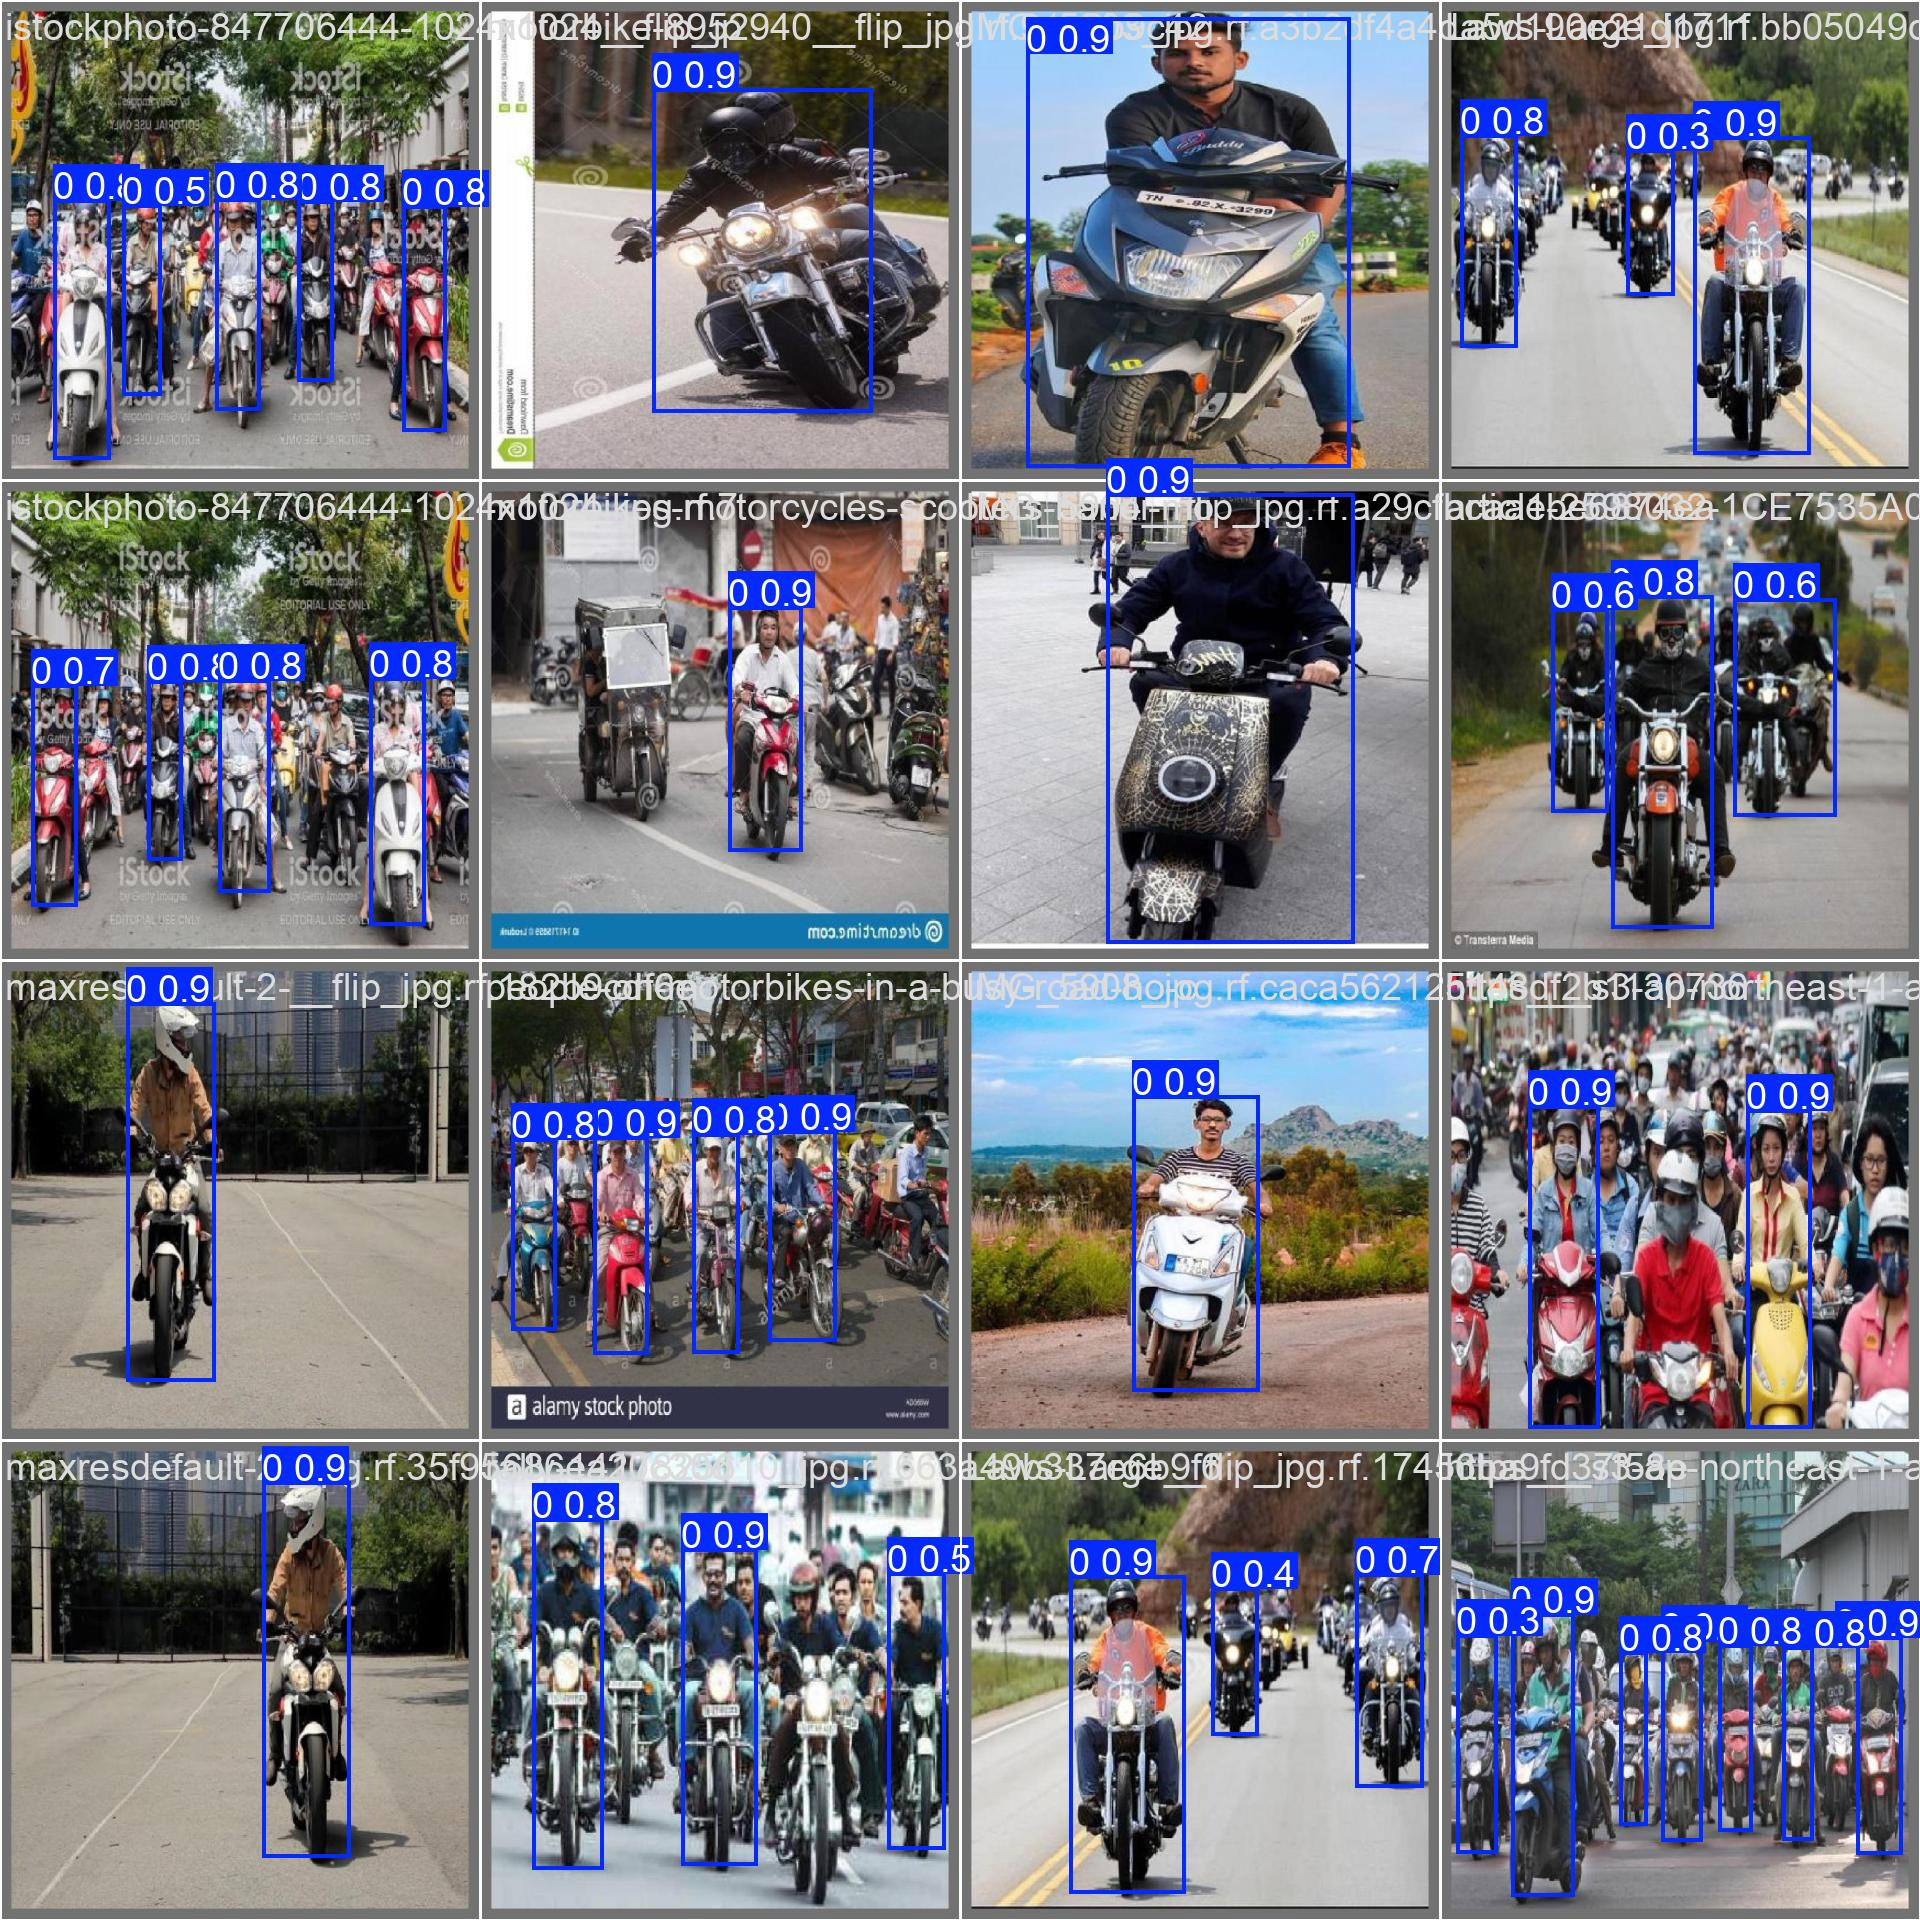

Batch 0 Prediction Image


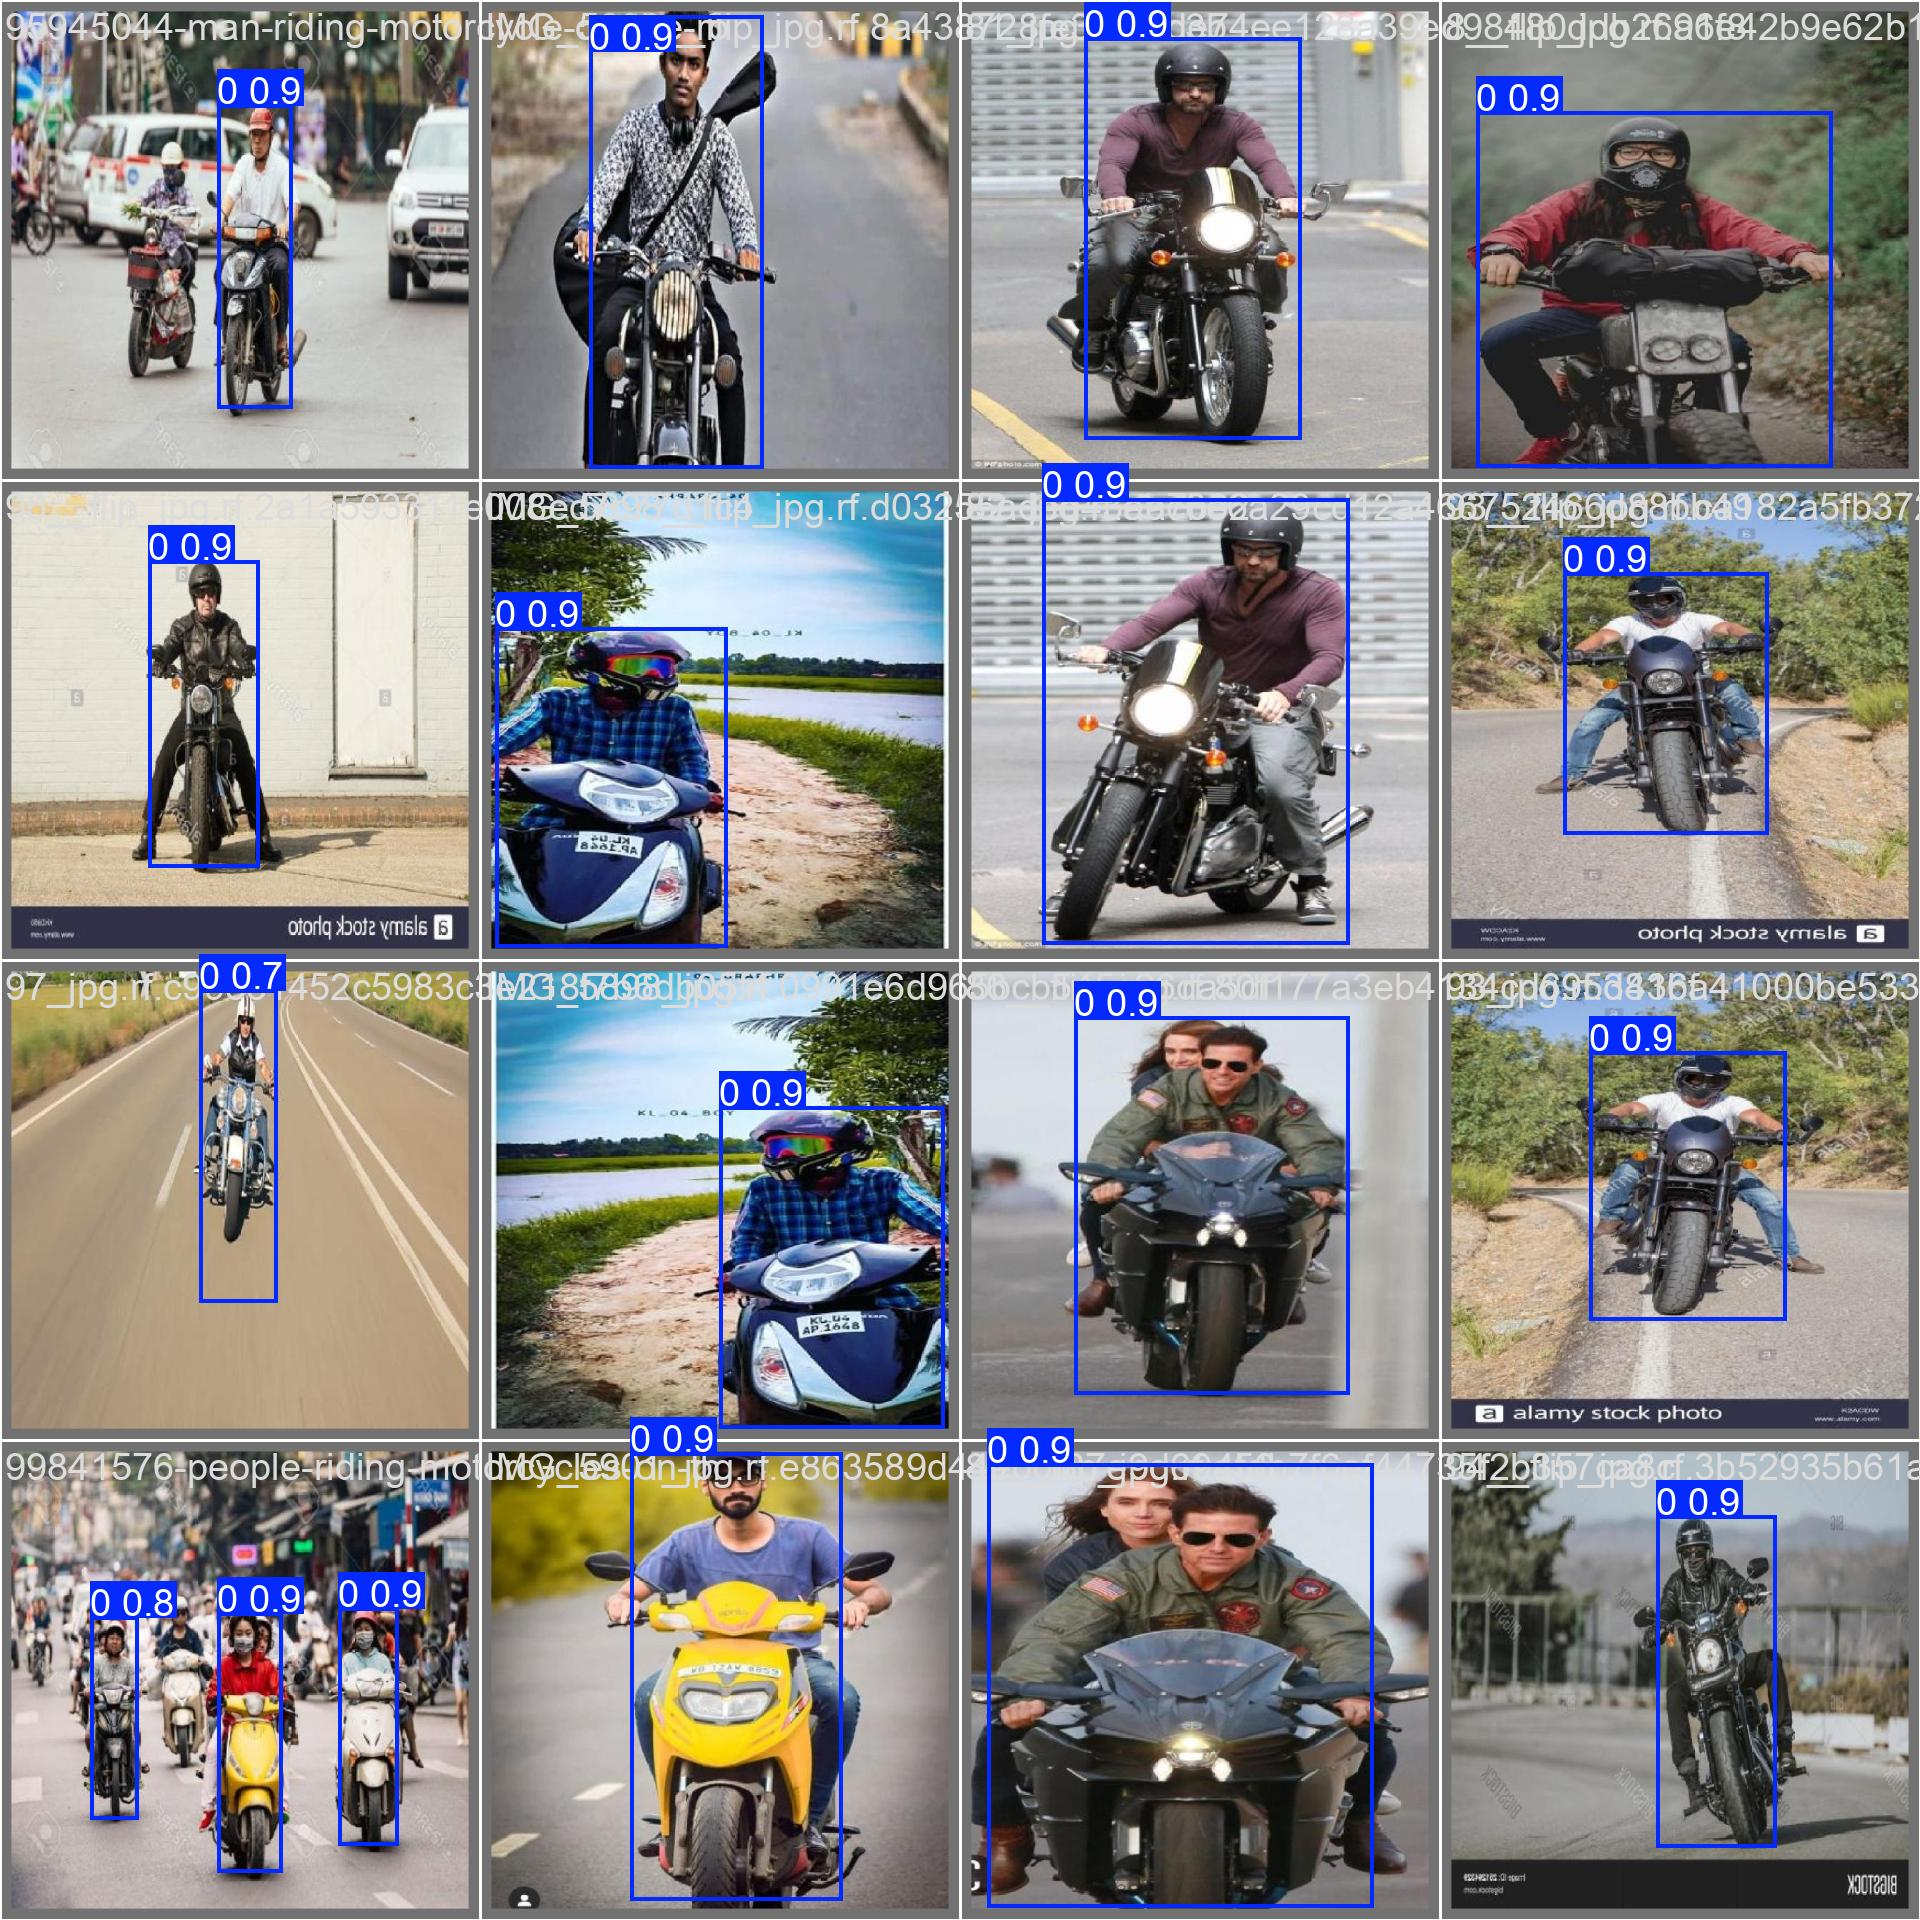

Batch 1 Prediction Image


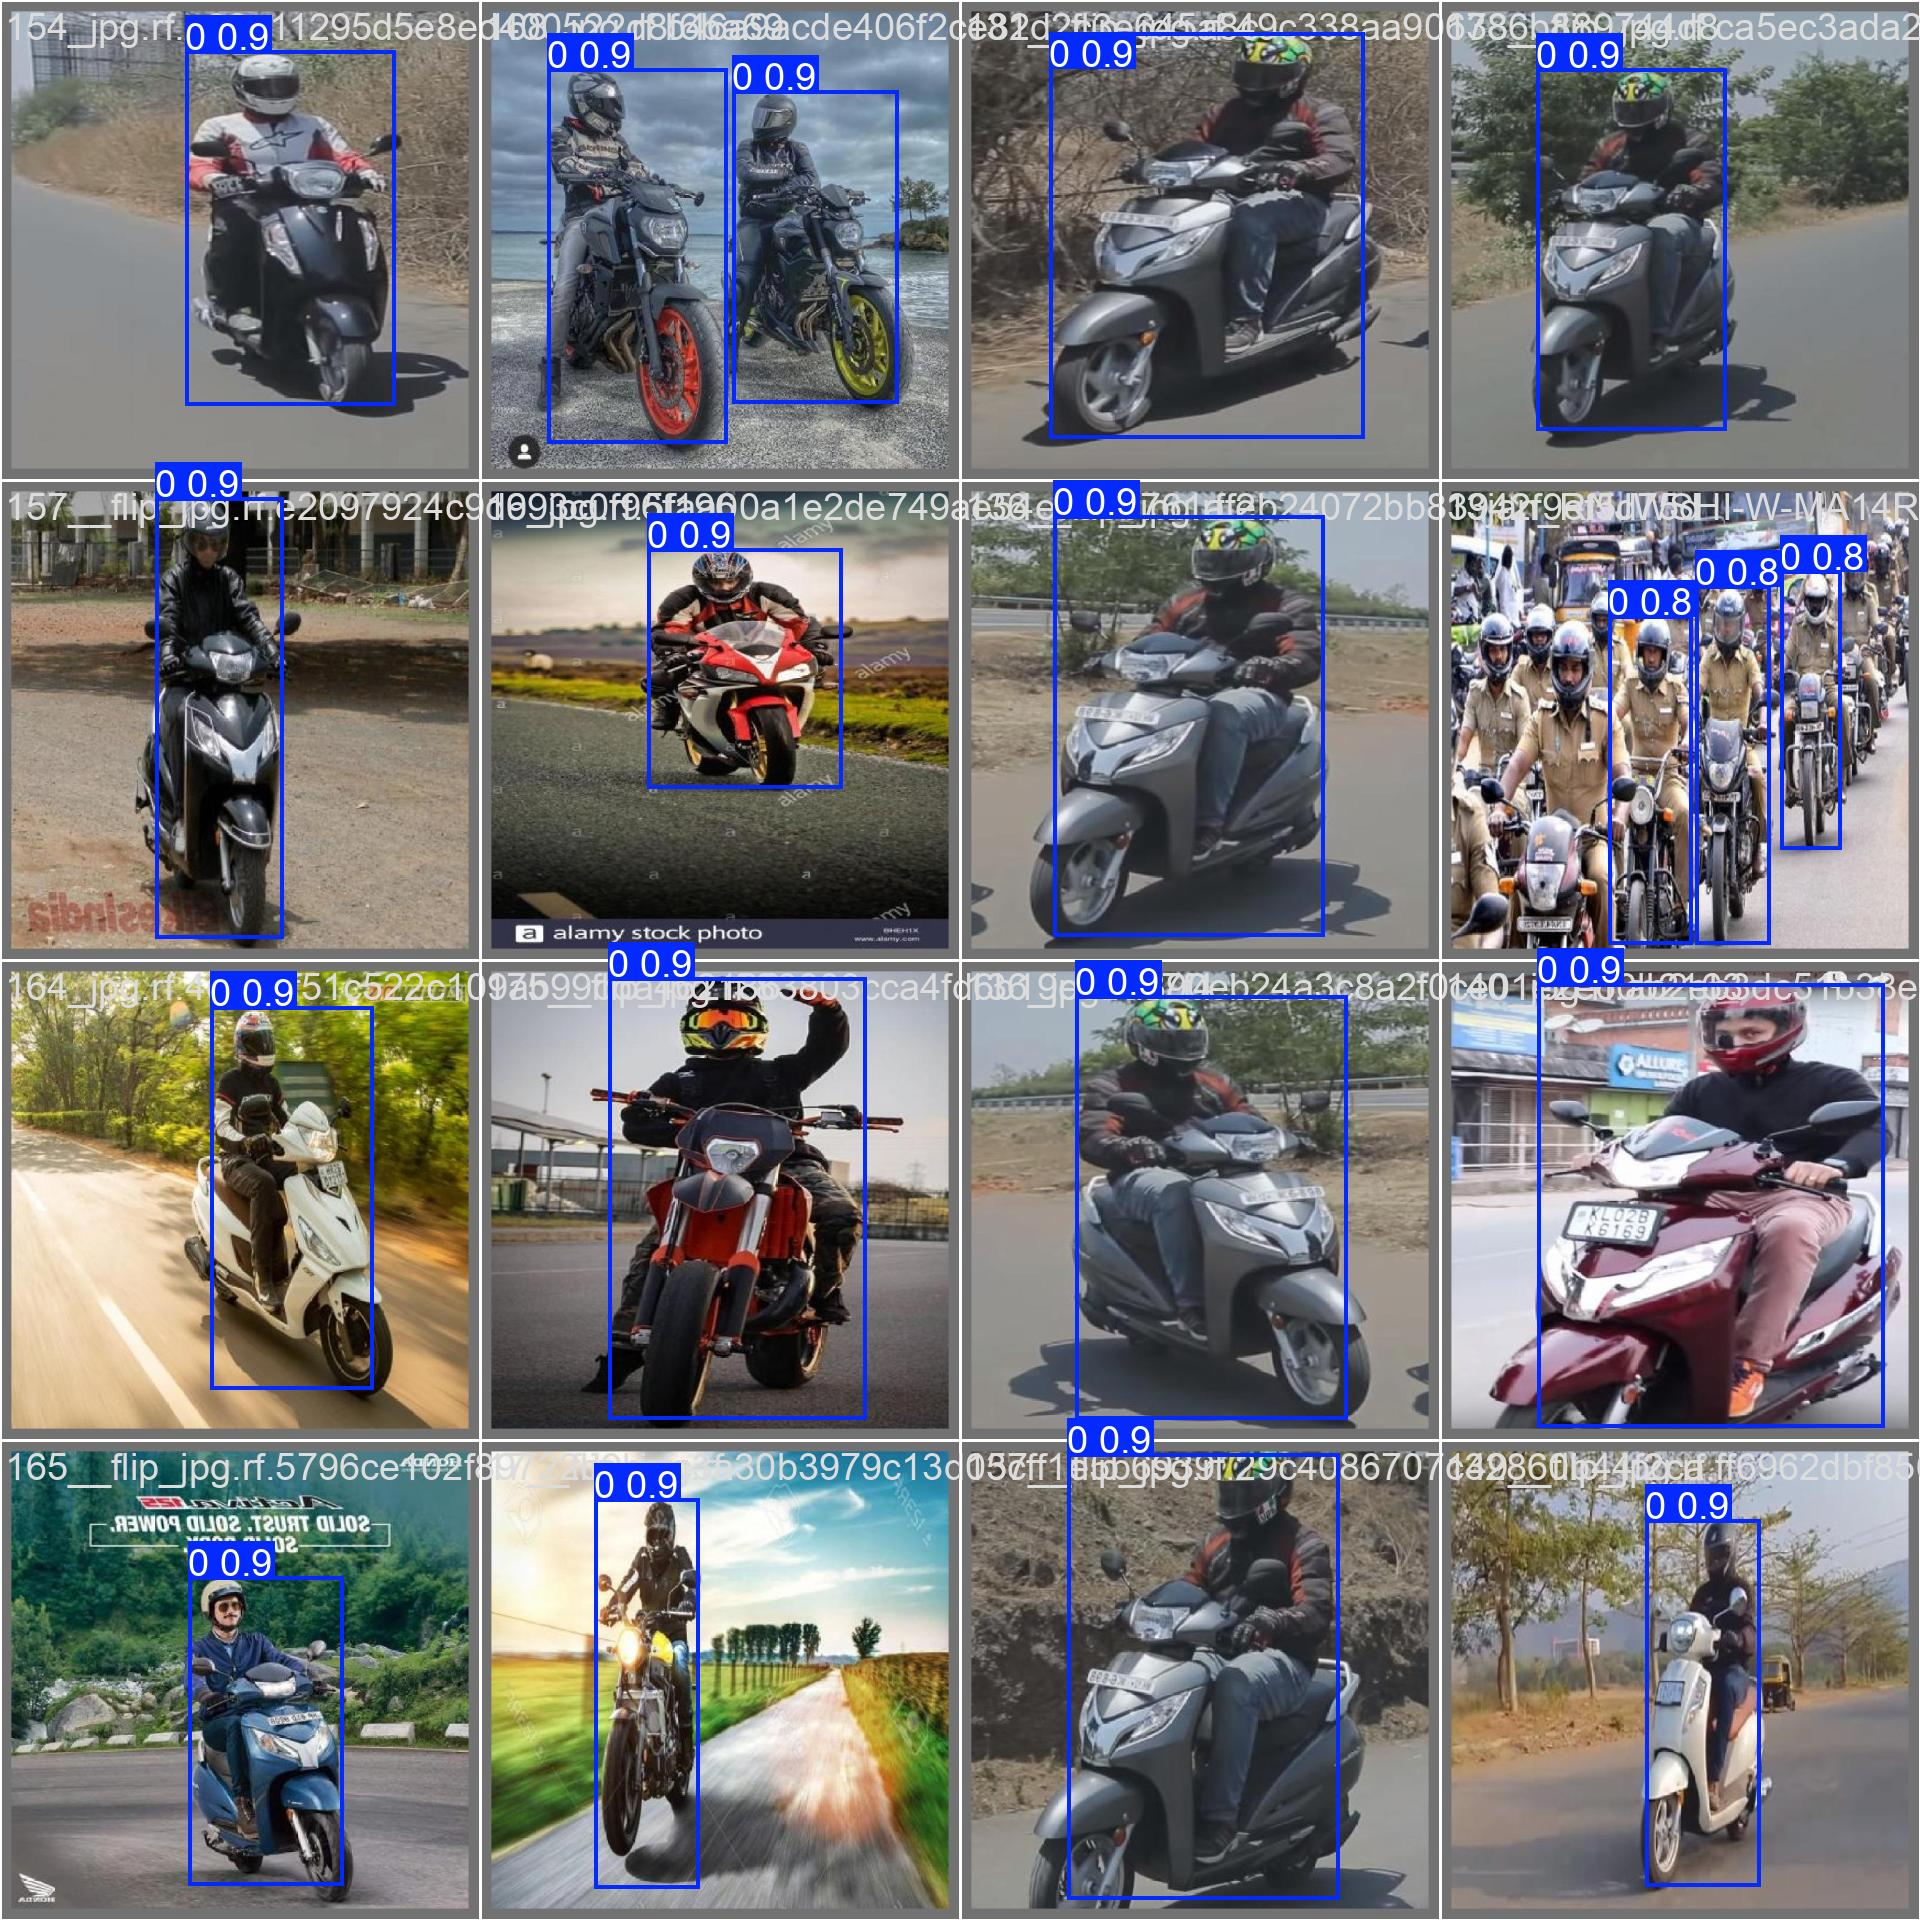

Batch 2 Prediction Image

Best Validation Metrics:
mAP@0.5: 0.988
mAP@0.5:0.95: 0.807
Precision: 0.958
Recall: 0.966


In [38]:
# Path to validation results
val_dir = "runs/detect/val"

# Display validation prediction images
print("Validation Prediction Samples:")
for i in range(3):  # Show batches 0, 1, 2
    pred_img = os.path.join(val_dir, f"val_batch{i}_pred.jpg")
    if os.path.exists(pred_img):
        display(Image(filename=pred_img, width=400))
        print(f"Batch {i} Prediction Image")

# Load and display the latest validation metrics (assuming results.csv exists)
results_path = os.path.join(val_dir, "../train/results.csv")  # Adjust if in a different train run
if os.path.exists(results_path):
    import pandas as pd
    df = pd.read_csv(results_path)
    best_metrics = df.loc[df['metrics/mAP50(B)'].idxmax()]
    print("\nBest Validation Metrics:")
    print(f"mAP@0.5: {best_metrics['metrics/mAP50(B)']:.3f}")
    print(f"mAP@0.5:0.95: {best_metrics['metrics/mAP50-95(B)']:.3f}")
    print(f"Precision: {best_metrics['metrics/precision(B)']:.3f}")
    print(f"Recall: {best_metrics['metrics/recall(B)']:.3f}")
else:
    print("Results.csv not found. Please ensure training data is saved.")

### **Display Validation Images and Metrics:**

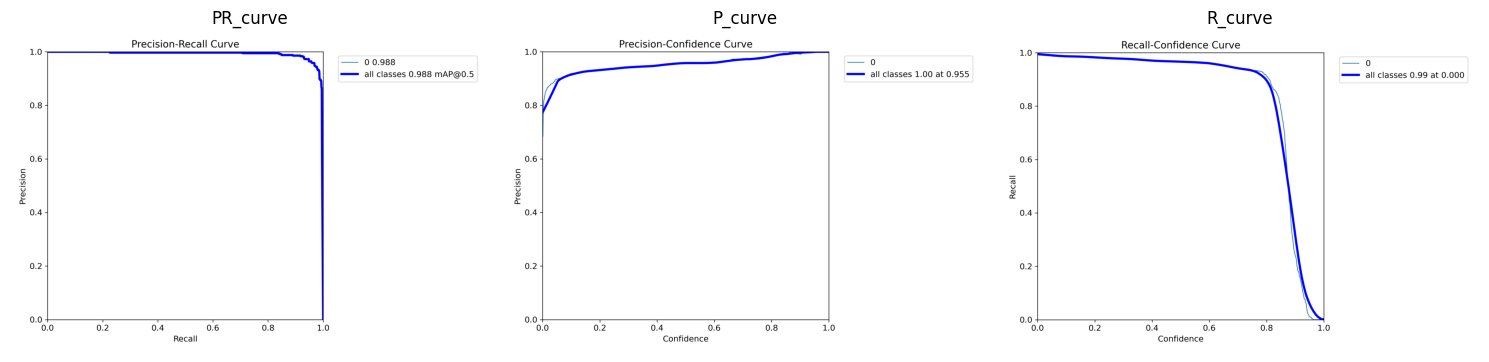

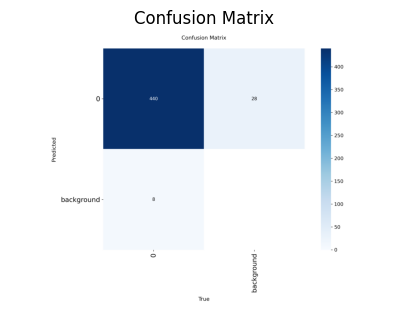

In [40]:
# Path to validation results
val_dir = "runs/detect/val"

# Display performance curves
plt.figure(figsize=(15, 5))
for i, curve in enumerate(['BoxPR_curve.png', 'BoxP_curve.png', 'BoxR_curve.png'], 1):
    plt.subplot(1, 3, i)
    img = mpimg.imread(os.path.join(val_dir, curve))
    plt.imshow(img)
    plt.title(curve.replace('.png', '').replace('Box', ''))
    plt.axis('off')
plt.tight_layout()
plt.show()

# Display confusion matrix
plt.figure(figsize=(5, 5))
conf_matrix = mpimg.imread(os.path.join(val_dir, 'confusion_matrix.png'))
plt.imshow(conf_matrix)
plt.title('Confusion Matrix')
plt.axis('off')
plt.show()

## **THE CODES BELOW ARE TO SHOW SOME OF THE PREDICTIONS**

In [29]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True save_txt=True

/kaggle/working
Ultralytics 8.3.187 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/251 /kaggle/working/Helmet-Detection-2/test/images/100__flip_jpg.rf.2e6f4ca8d08de88ba8192e428685d851.jpg: 640x640 1 0, 37.0ms
image 2/251 /kaggle/working/Helmet-Detection-2/test/images/112__flip_jpg.rf.2970fe26236bfd21a15983fe7ae761bc.jpg: 640x640 1 0, 36.9ms
image 3/251 /kaggle/working/Helmet-Detection-2/test/images/115_jpg.rf.5d62ba0eb15d3b8153eb3a289db9e8b4.jpg: 640x640 1 0, 36.9ms
image 4/251 /kaggle/working/Helmet-Detection-2/test/images/117__flip_jpg.rf.6dac7cdfe9aa917f0293d95ccfb8462d.jpg: 640x640 1 0, 36.9ms
image 5/251 /kaggle/working/Helmet-Detection-2/test/images/122235900-ho-chi-minh-city-viet-nam-april-26-2019-group-of-vietnamese-wear-glasses-face-mask-ride-motorbike-un_jpg.rf.e59f8ca36f4cb9ceef18038a68643f29.jpg: 640x640 3 0s, 36.9ms
image 6/251 /kaggle/working/Helmet-Detection-2/test/

In [31]:
source_folder = "/kaggle/working/runs/detect/predict"
output_zip = "predict_results.zip"
shutil.make_archive(output_zip.replace(".zip", ""), "zip", source_folder)
FileLink(output_zip)

/kaggle/working/predict_results.zip

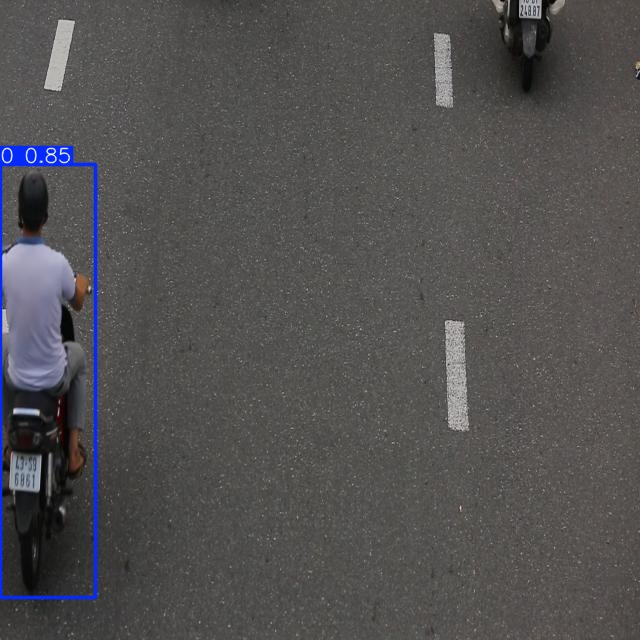

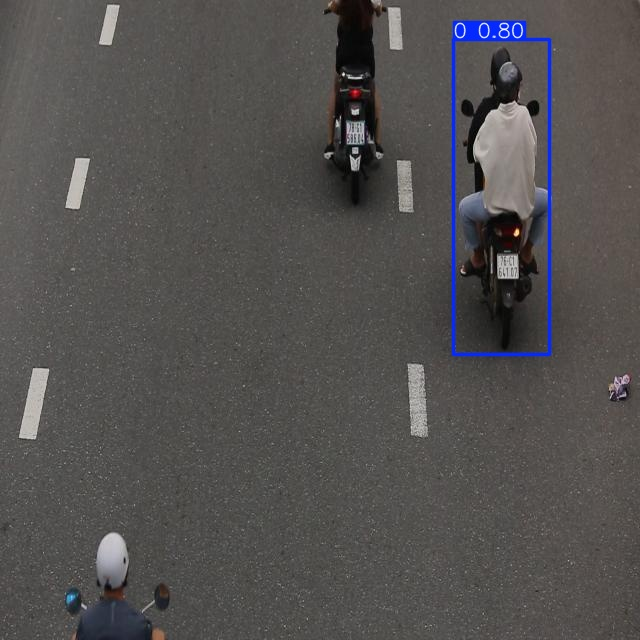

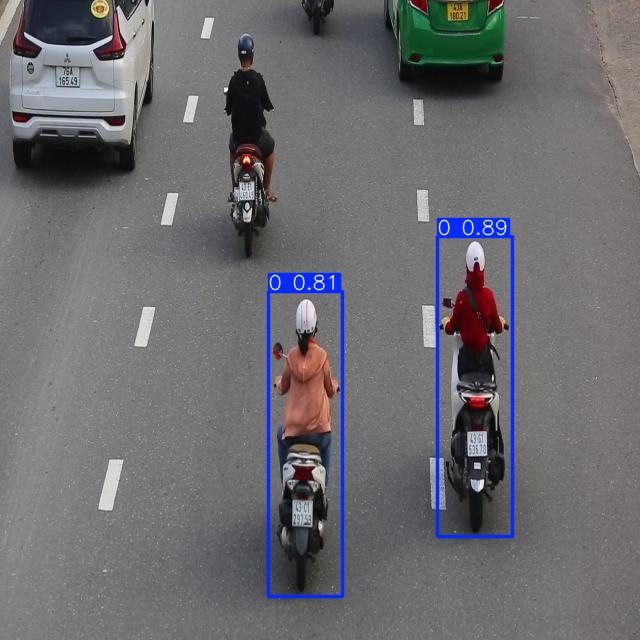

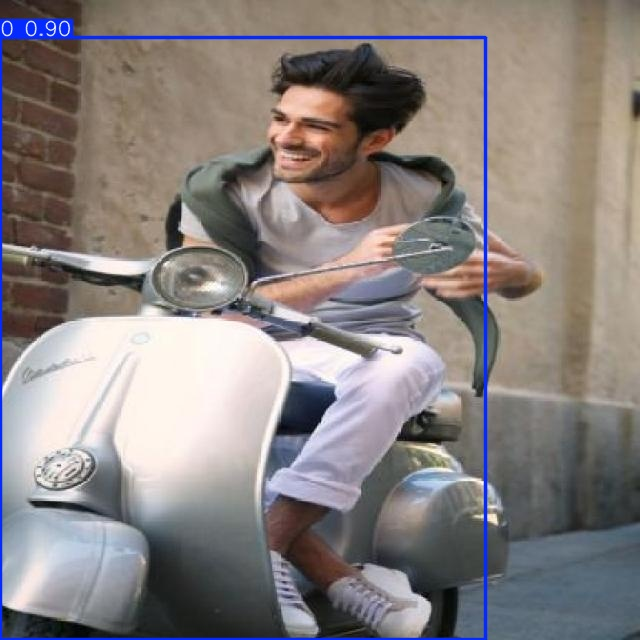

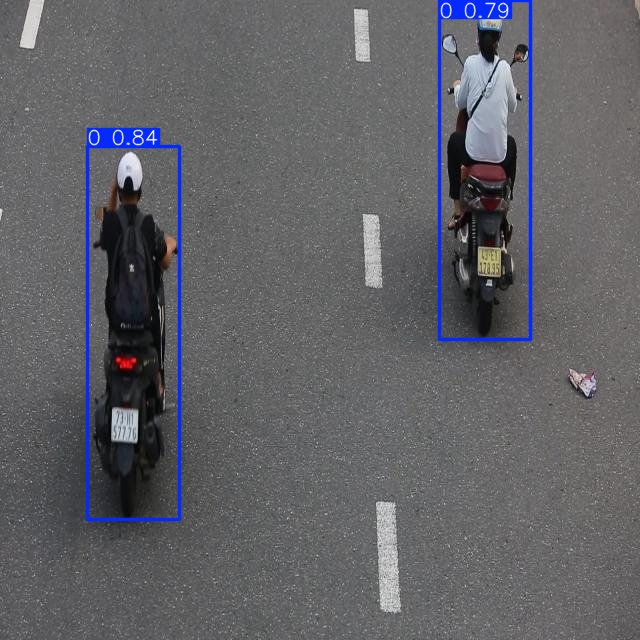

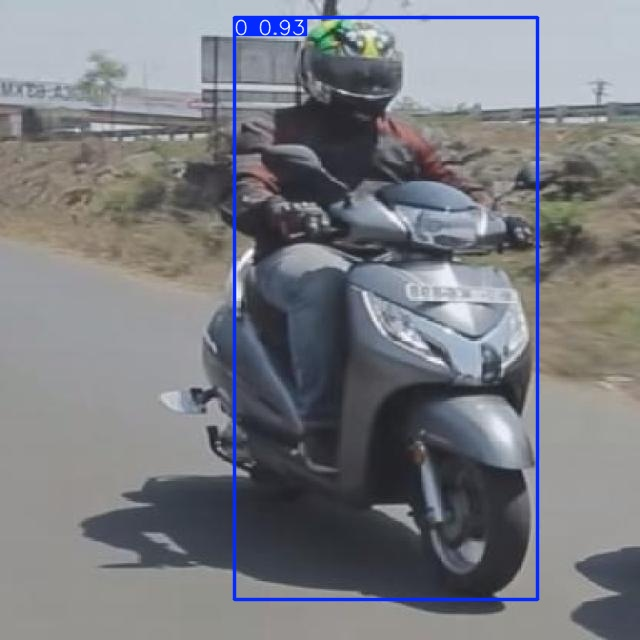

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [34]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.3.187, to fix: `pip install ultralytics==8.0.196`


Would you like to continue with the wrong version of ultralytics? y/n:  y


View the status of your deployment at: https://app.roboflow.com/minh-t81tk/helmet-detection-hxqdb/2
Share your model with the world at: https://universe.roboflow.com/minh-t81tk/helmet-detection-hxqdb/model/2
